This data comes from https://www.nhtsa.gov/crash-data-systems/crash-report-sampling-system
Information about naming conventions, and other information can be found https://static.nhtsa.gov/nhtsa/downloads/CRSS/Manuals/Analytical%20User%20Manual/2016-2019%20CRSS%20Analytical%20User%20Manual%20-%20DOT%20HS%20813%20022.pdf

In [2]:
import pandas as pd
import os

In [3]:
directory = r'Accidents'
files = {}
for filename in os.listdir(directory):
    if filename.endswith(".csv") or filename.endswith(".CSV"):
        files[filename[:-4]] = os.path.join(directory, filename)
        assert files[filename[:-4]] == os.path.join(directory, filename)
    else:
        continue
dfs = files.copy()

In [4]:
files

{'accident': 'Accidents\\accident.CSV',
 'ACC_AUX': 'Accidents\\ACC_AUX.csv',
 'cevents': 'Accidents\\cevents.CSV',
 'damage': 'Accidents\\damage.CSV',
 'distract': 'Accidents\\distract.CSV',
 'drimpair': 'Accidents\\drimpair.CSV',
 'factor': 'Accidents\\factor.CSV',
 'maneuver': 'Accidents\\maneuver.CSV',
 'nmcrash': 'Accidents\\nmcrash.CSV',
 'nmdistract': 'Accidents\\nmdistract.CSV',
 'nmimpair': 'Accidents\\nmimpair.CSV',
 'nmprior': 'Accidents\\nmprior.CSV',
 'parkwork': 'Accidents\\parkwork.CSV',
 'pbtype': 'Accidents\\pbtype.CSV',
 'person': 'Accidents\\person.CSV',
 'PER_AUX': 'Accidents\\PER_AUX.csv',
 'safetyeq': 'Accidents\\safetyeq.CSV',
 'vehicle': 'Accidents\\vehicle.CSV',
 'VEH_AUX': 'Accidents\\VEH_AUX.csv',
 'vevent': 'Accidents\\vevent.CSV',
 'violatn': 'Accidents\\violatn.CSV',
 'vision': 'Accidents\\vision.CSV',
 'vsoe': 'Accidents\\vsoe.CSV'}

In [5]:
for key in dfs:
    dfs[key] = pd.read_csv(dfs[key])
print(dfs)

F:\Anaconda\envs\mlenv\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (45,47,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


{'accident':             CASENUM  STRATUM                              STRATUMNAME  REGION  \
0      201901174219       10                       Stratum 10 - Other       3   
1      201901176655        6          Stratum 6 - LMY PV Minor Injury       3   
2      201901176667        8         Stratum 8 - NLMY PV Minor Injury       3   
3      201901176694        9  Stratum 9 - LMY PV No Injuries in Crash       3   
4      201901176702        6          Stratum 6 - LMY PV Minor Injury       3   
...             ...      ...                                      ...     ...   
54404  201902285920        8         Stratum 8 - NLMY PV Minor Injury       4   
54405  201902285944        7             Stratum 7 - M/H Truck or Bus       2   
54406  201902285945       10                       Stratum 10 - Other       2   
54407  201902285953        9  Stratum 9 - LMY PV No Injuries in Crash       2   
54408  201902285965        6          Stratum 6 - LMY PV Minor Injury       2   

              

In [6]:
# used to merge dfs
index_dfs = dfs.copy()
for key in index_dfs:
    index_dfs[key] = index_dfs[key].set_index("CASENUM")

In [14]:
mega_df = []
mega_df = index_dfs['accident'].join(index_dfs['vehicle'], rsuffix="_vehicle")
mega_df = mega_df.join(index_dfs['person'], rsuffix="_person")
mega_df.head()

,STRATUM,STRATUMNAME,REGION,REGIONNAME,PSU,PJ,PSU_VAR,URBANICITY,URBANICITYNAME,VE_TOTAL,...,INJSEV_IM,INJSEV_IMNAME,EJECT_IM,EJECT_IMNAME,PERALCH_IM,PERALCH_IMNAME,SEAT_IM,SEAT_IMNAME,AGE_IM,AGE_IMNAME
CASENUM,,,,,,,,,,,,,,,,,,,,,
201901174219,10,Stratum 10 - Other,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",75,4144,75,2,Rural Area,1,...,0.0,No Apparent Injury (O),0.0,Not Ejected,0.0,No (Alcohol Not Involved),11.0,"Front Seat, Left Side",39.0,39 Years
201901176655,6,Stratum 6 - LMY PV Minor Injury,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",63,4135,63,2,Rural Area,2,...,0.0,No Apparent Injury (O),0.0,Not Ejected,0.0,No (Alcohol Not Involved),11.0,"Front Seat, Left Side",20.0,20 Years
201901176655,6,Stratum 6 - LMY PV Minor Injury,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",63,4135,63,2,Rural Area,2,...,1.0,Possible Injury (C),0.0,Not Ejected,0.0,No (Alcohol Not Involved),13.0,"Front Seat, Right Side",19.0,19 Years
201901176655,6,Stratum 6 - LMY PV Minor Injury,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",63,4135,63,2,Rural Area,2,...,0.0,No Apparent Injury (O),0.0,Not Ejected,0.0,No (Alcohol Not Involved),13.0,"Front Seat, Right Side",47.0,47 Years
201901176655,6,Stratum 6 - LMY PV Minor Injury,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",63,4135,63,2,Rural Area,2,...,0.0,No Apparent Injury (O),0.0,Not Ejected,0.0,No (Alcohol Not Involved),21.0,"Second Seat, Left Side",39.0,39 Years


In [22]:
accidents = dfs['accident'].copy()
for column in accidents:
    if "_IM" in column:
        accidents = accidents.drop(column, axis=1)
accidents.columns

Index(['CASENUM', 'STRATUM', 'STRATUMNAME', 'REGION', 'REGIONNAME', 'PSU',
       'PJ', 'PSU_VAR', 'URBANICITY', 'URBANICITYNAME', 'VE_TOTAL', 'VE_FORMS',
       'PVH_INVL', 'PEDS', 'PERMVIT', 'PERNOTMVIT', 'NUM_INJ', 'NUM_INJNAME',
       'MONTH', 'MONTHNAME', 'YEAR', 'YEARNAME', 'DAY_WEEK', 'DAY_WEEKNAME',
       'HOUR', 'HOURNAME', 'MINUTE', 'MINUTENAME', 'HARM_EV', 'HARM_EVNAME',
       'ALCOHOL', 'ALCOHOLNAME', 'MAX_SEV', 'MAX_SEVNAME', 'MAN_COLL',
       'MAN_COLLNAME', 'RELJCT1', 'RELJCT1NAME', 'RELJCT2', 'RELJCT2NAME',
       'TYP_INT', 'TYP_INTNAME', 'WRK_ZONE', 'WRK_ZONENAME', 'REL_ROAD',
       'REL_ROADNAME', 'LGT_COND', 'LGT_CONDNAME', 'WEATHER1', 'WEATHER1NAME',
       'WEATHER2', 'WEATHER2NAME', 'WEATHER', 'WEATHERNAME', 'SCH_BUS',
       'SCH_BUSNAME', 'INT_HWY', 'INT_HWYNAME', 'CF1', 'CF1NAME', 'CF2',
       'CF2NAME', 'CF3', 'CF3NAME', 'PSUSTRAT', 'WEIGHT'],
      dtype='object')

In [27]:
vehicles = dfs['vehicle'].copy()
for column in vehicles:
    if ("_IM" in column) or ("VIN" in column):
        vehicles = vehicles.drop(column, axis=1)
vehicles.columns

Index(['CASENUM', 'VEH_NO', 'STRATUM', 'STRATUMNAME', 'REGION', 'REGIONNAME',
       'PSU', 'PJ', 'PSU_VAR', 'URBANICITY',
       ...
       'P_CRASH3', 'P_CRASH3NAME', 'PCRASH4', 'PCRASH4NAME', 'PCRASH5',
       'PCRASH5NAME', 'ACC_TYPE', 'ACC_TYPENAME', 'PSUSTRAT', 'WEIGHT'],
      dtype='object', length=145)

In [19]:
dfs['accident']['YEAR'].value_counts()

2019    54409
Name: YEAR, dtype: int64

In [ ]:
accidents_text_df = dfs['accident']

In [18]:
dfs['accident']['ALCOHOLNAME'].value_counts()

No Alcohol Involved     34615
Reported as Unknown     17315
Alcohol Involved         2450
No applicable person       29
Name: ALCOHOLNAME, dtype: int64

In [1]:
dfs['cevent']['AOI1']

NameError: name 'dfs' is not defined

In [68]:
dfs['accident'].columns

Index(['CASENUM', 'STRATUM', 'STRATUMNAME', 'REGION', 'REGIONNAME', 'PSU',
       'PJ', 'PSU_VAR', 'URBANICITY', 'URBANICITYNAME', 'VE_TOTAL', 'VE_FORMS',
       'PVH_INVL', 'PEDS', 'PERMVIT', 'PERNOTMVIT', 'NUM_INJ', 'NUM_INJNAME',
       'MONTH', 'MONTHNAME', 'YEAR', 'YEARNAME', 'DAY_WEEK', 'DAY_WEEKNAME',
       'HOUR', 'HOURNAME', 'MINUTE', 'MINUTENAME', 'HARM_EV', 'HARM_EVNAME',
       'ALCOHOL', 'ALCOHOLNAME', 'MAX_SEV', 'MAX_SEVNAME', 'MAN_COLL',
       'MAN_COLLNAME', 'RELJCT1', 'RELJCT1NAME', 'RELJCT2', 'RELJCT2NAME',
       'TYP_INT', 'TYP_INTNAME', 'WRK_ZONE', 'WRK_ZONENAME', 'REL_ROAD',
       'REL_ROADNAME', 'LGT_COND', 'LGT_CONDNAME', 'WEATHER1', 'WEATHER1NAME',
       'WEATHER2', 'WEATHER2NAME', 'WEATHER', 'WEATHERNAME', 'SCH_BUS',
       'SCH_BUSNAME', 'INT_HWY', 'INT_HWYNAME', 'CF1', 'CF1NAME', 'CF2',
       'CF2NAME', 'CF3', 'CF3NAME', 'PSUSTRAT', 'WEIGHT', 'WKDY_IM',
       'WKDY_IMNAME', 'HOUR_IM', 'HOUR_IMNAME', 'MINUTE_IM', 'MINUTE_IMNAME',
       'EVENT1_IM', 'EV

In [27]:
accident['MAXSEV_IMNAME'].value_counts()

No Apparent Injury (O)          27145
Possible Injury (C)             12540
Suspected Minor Injury (B)       8236
Suspected Serious Injury (A)     5256
Fatal Injury (K)                  979
Injured, Severity Unknown         225
No person involved                 24
Died Prior to Crash*                4
Name: MAXSEV_IMNAME, dtype: int64

In [35]:
dfs['vehicle'].head()

,CASENUM,VEH_NO,STRATUM,STRATUMNAME,REGION,REGIONNAME,PSU,PJ,PSU_VAR,URBANICITY,...,VEVENT_IM,VEVENT_IMNAME,PCRASH1_IM,PCRASH1_IMNAME,MXVSEV_IM,MXVSEV_IMNAME,NUMINJ_IM,NUMINJ_IMNAME,V_ALCH_IM,V_ALCH_IMNAME
0,201901174219,1,10,Stratum 10 - Other,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",75,4144,75,2,...,1,Rollover/Overturn,3,Accelerating in Road,0,No Apparent Injury (O),0,No Person Injured in Vehicle,2,No Alcohol Involved
1,201901176655,1,6,Stratum 6 - LMY PV Minor Injury,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",63,4135,63,2,...,12,Motor Vehicle In-Transport,1,Going Straight,1,Possible Injury (C),1,1,2,No Alcohol Involved
2,201901176655,2,6,Stratum 6 - LMY PV Minor Injury,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",63,4135,63,2,...,12,Motor Vehicle In-Transport,1,Going Straight,1,Possible Injury (C),1,1,2,No Alcohol Involved
3,201901176667,1,8,Stratum 8 - NLMY PV Minor Injury,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",65,4138,65,1,...,12,Motor Vehicle In-Transport,15,Changing Lanes,2,Suspected Minor Injury (B),1,1,1,Alcohol Involved
4,201901176667,2,8,Stratum 8 - NLMY PV Minor Injury,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",65,4138,65,1,...,12,Motor Vehicle In-Transport,11,Turning Left,1,Possible Injury (C),1,1,2,No Alcohol Involved


In [9]:
vehicle_df['MAK_MODNAME'].value_counts()

Ford F-Series pickup                                                                                                                2798
Toyota Camry                                                                                                                        2512
Honda Accord (Note: For Crosstour model years 2010 and 2011 only. For Crosstour model years 2012-2015, see vehicle model 37-405)    2480
Chevrolet C, K, R, V-series pickup/Silverado                                                                                        2278
Honda Civic/CRX, del Sol                                                                                                            2226
                                                                                                                                    ... 
Chevrolet Motor Home                                                                                                                   1
Infiniti J30                             

In [10]:
vehicle_df['HOURNAME'].value_counts()

5:00pm-5:59pm      8894
4:00pm-4:59pm      8110
3:00pm-3:59pm      7952
2:00pm-2:59pm      6595
6:00pm-6:59pm      6393
12:00pm-12:59pm    5856
1:00pm-1:59pm      5692
7:00am-7:59am      5226
8:00am-8:59am      5163
11:00am-11:59am    5033
7:00pm-7:59pm      4305
9:00am-9:59am      4068
10:00am-10:59am    3965
8:00pm-8:59pm      3427
9:00pm-9:59pm      2957
6:00am-6:59am      2791
10:00pm-10:59pm    2262
11:00pm-11:59pm    1665
5:00am-5:59am      1431
0:00am-0:59am      1259
1:00am-1:59am       949
2:00am-2:59am       899
4:00am-4:59am       720
3:00am-3:59am       678
Unknown Hours       427
Name: HOURNAME, dtype: int64

In [11]:
vehicle_df['STRATUMNAME'].value_counts()

Stratum 9 - LMY PV No Injuries in Crash     25637
Stratum 10 - Other                          18747
Stratum 6 - LMY PV Minor Injury             16159
Stratum 8 - NLMY PV Minor Injury            12084
Stratum 7 - M/H Truck or Bus                 7223
Stratum 2 - Not a MV Occupant Any Injury     4905
Stratum 5 - NLMY PV Serious Injury           4662
Stratum 3 - Motorcycle Any Injury            4411
Stratum 4 - LMY PV Serious Injury            2889
Name: STRATUMNAME, dtype: int64

In [12]:
vehicle_df['HARM_EVNAME'].value_counts()

Motor Vehicle In-Transport                                                                                                               78374
Pedestrian                                                                                                                                2695
Parked Motor Vehicle                                                                                                                      2028
Live Animal                                                                                                                               1858
Pedalcyclist                                                                                                                              1782
Rollover/Overturn                                                                                                                         1265
Ditch                                                                                                                                      934

In [15]:
vehicle_df['MXVSEV_IMNAME'].value_counts()

No Apparent Injury (O)          67985
Possible Injury (C)             14615
Suspected Minor Injury (B)       7941
Suspected Serious Injury (A)     4952
Fatal Injury (K)                  775
Injured, Severity Unknown         245
No person involved                199
Died Prior to Crash*                5
Name: MXVSEV_IMNAME, dtype: int64

In [16]:
vehicle_df['MDLYR_IM'].value_counts()

2015    7966
2016    7702
2017    7593
2018    7241
2014    5413
        ... 
1958       1
1934       1
1956       1
1950       1
1953       1
Name: MDLYR_IM, Length: 66, dtype: int64

<AxesSubplot:>

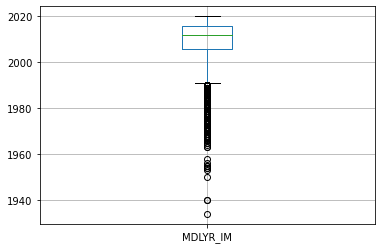

In [18]:
vehicle_df.boxplot(column="MDLYR_IM")

In [19]:
vehicle_df['V_ALCH_IMNAME'].value_counts()

No Alcohol Involved    93809
Alcohol Involved        2908
Name: V_ALCH_IMNAME, dtype: int64

In [24]:
vehicle_df[(vehicle_df['V_ALCH_IMNAME'] == 'Alcohol Involved') & (vehicle_df['MXVSEV_IMNAME'] == "Fatal Injury (K)")]

,CASENUM,VEH_NO,STRATUM,STRATUMNAME,REGION,REGIONNAME,PSU,PJ,PSU_VAR,URBANICITY,...,VEVENT_IM,VEVENT_IMNAME,PCRASH1_IM,PCRASH1_IMNAME,MXVSEV_IM,MXVSEV_IMNAME,NUMINJ_IM,NUMINJ_IMNAME,V_ALCH_IM,V_ALCH_IMNAME
56,201901182029,2,3,Stratum 3 - Motorcycle Any Injury,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",12,4142,12,1,...,12,Motor Vehicle In-Transport,5,Stopped in Roadway,4,Fatal Injury (K),1,1,1,Alcohol Involved
689,201901203030,1,5,Stratum 5 - NLMY PV Serious Injury,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",70,138,70,2,...,12,Motor Vehicle In-Transport,1,Going Straight,4,Fatal Injury (K),1,1,1,Alcohol Involved
1014,201901212172,1,5,Stratum 5 - NLMY PV Serious Injury,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",35,4141,35,1,...,1,Rollover/Overturn,14,Negotiating a Curve,4,Fatal Injury (K),1,1,1,Alcohol Involved
1612,201901225509,1,4,Stratum 4 - LMY PV Serious Injury,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",75,4144,75,2,...,39,Wall,14,Negotiating a Curve,4,Fatal Injury (K),2,2,1,Alcohol Involved
1694,201901226603,1,5,Stratum 5 - NLMY PV Serious Injury,2,"Midwest (OH, IN, IL, MI, WI, MN, ND, SD, NE, I...",58,4143,58,1,...,1,Rollover/Overturn,14,Negotiating a Curve,4,Fatal Injury (K),1,1,1,Alcohol Involved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92827,201902184217,1,5,Stratum 5 - NLMY PV Serious Injury,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",54,526,54,1,...,1,Rollover/Overturn,14,Negotiating a Curve,4,Fatal Injury (K),2,2,1,Alcohol Involved
93332,201902193830,1,3,Stratum 3 - Motorcycle Any Injury,3,"South (MD, DE, DC, WV, VA, KY, TN, NC, SC, GA,...",52,610,52,2,...,1,Rollover/Overturn,14,Negotiating a Curve,4,Fatal Injury (K),1,1,1,Alcohol Involved
94384,201902208397,1,3,Stratum 3 - Motorcycle Any Injury,1,"Northeast (PA, NJ, NY, NH, VT, RI, MA, ME, CT)",31,1708,31,1,...,42,Tree (Standing Only),14,Negotiating a Curve,4,Fatal Injury (K),1,1,1,Alcohol Involved
95230,201902229179,1,5,Stratum 5 - NLMY PV Serious Injury,4,"West (MT, ID, WA, OR, CA, NV, NM, AZ, UT, CO, ...",56,211,211,1,...,12,Motor Vehicle In-Transport,1,Going Straight,4,Fatal Injury (K),1,1,1,Alcohol Involved


In [29]:
fars_accident_file = ('FARS/accident.csv')
fars_accident_df = pd.read_csv(fars_accident_file)
fars_accident_df.head()

F:\Anaconda\envs\mlenv\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (40,42,69) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STATE,STATENAME,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,...,HOSP_MN,HOSP_MNNAME,CF1,CF1NAME,CF2,CF2NAME,CF3,CF3NAME,FATALS,DRUNK_DR
0,1,Alabama,10001,2,2,0,0,3,3,0,...,27,27,0,None,0,None,0,None,1,1
1,1,Alabama,10002,2,2,0,0,2,2,0,...,99,Unknown EMS Hospital Arrival Time,0,None,0,None,0,None,1,0
2,1,Alabama,10003,3,3,0,0,4,4,0,...,5,5,14,"Motor Vehicle struck by falling cargo,or somet...",0,None,0,None,1,0
3,1,Alabama,10004,1,1,0,1,1,1,1,...,88,Not Applicable (Not Transported),0,None,0,None,0,None,1,0
4,1,Alabama,10005,1,1,0,0,1,1,0,...,88,Not Applicable (Not Transported),0,None,0,None,0,None,1,1


In [46]:
dfs['vehicle'].isnull().sum().sum()

0

In [64]:
# Look for null values in tables
for key in dfs:
    if dfs[key].isnull().sum().sum() != 0:
        print(f"{key} - {dfs[key].isnull().sum().sum()}")
        # find which fields are null in the table
        for column in dfs[key]:
            if dfs[key][column].isnull().sum() != 0:
                print(f'{column} - {dfs[key][column].isnull().sum()}')

person - 99460
MAKE - 4973
MAKENAME - 4973
MAK_MOD - 4973
MAK_MODNAME - 4973
BODY_TYP - 4973
BODY_TYPNAME - 4973
MOD_YEAR - 4973
MOD_YEARNAME - 4973
TOW_VEH - 4973
TOW_VEHNAME - 4973
SPEC_USE - 4973
SPEC_USENAME - 4973
EMER_USE - 4973
EMER_USENAME - 4973
ROLLOVER - 4973
ROLLOVERNAME - 4973
IMPACT1 - 4973
IMPACT1NAME - 4973
FIRE_EXP - 4973
FIRE_EXPNAME - 4973
